In [1]:
from sklearn.datasets import load_boston

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = load_boston()

In [4]:
dataset = pd.DataFrame(df.data)

In [5]:
dataset.columns = df.feature_names

In [6]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
dataset["Price"] = df.target

In [8]:
X =dataset.iloc[:,:1]
y = dataset.iloc[:,-1]

# Linear Regression

In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
mse = cross_val_score(lin_reg,X,y,scoring='neg_mean_squared_error',cv =5)
mean_mse = np.mean(mse)

In [10]:
print(mse)

[ -37.29856463  -90.26649703 -136.57347572  -77.11581342  -51.62475583]


# Ridge Regression

In [11]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()

# alpha is the lambda value in the lasso regression
parameters ={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor = GridSearchCV(ridge,parameters,scoring = 'neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [12]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 100}
-78.57549378280781


# Lasso Regression

In [17]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso =Lasso()
parameters ={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regression = GridSearchCV(lasso,parameters,scoring = 'neg_mean_squared_error',cv=5)
lasso_regression.fit(X,y)

/Users/apple/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9063.600104836436, tolerance: 3.9191485420792076
  positive)
/Users/apple/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2243.1527211557695, tolerance: 3.3071316790123455
  positive)
/Users/apple/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1475.713950820309, tolerance: 2.813643886419753
  positive)
/Users/apple/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might w

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [18]:
print(lasso_regression.best_params_)
print(lasso_regression.best_score_)

{'alpha': 1e-15}
-78.57582132718443


In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.3,random_state =0)

In [22]:
prediction_lasso =lasso_regression.predict(X_test)
prediction_ridge = ridge_regressor.predict(X_test)

<AxesSubplot:xlabel='Price'>

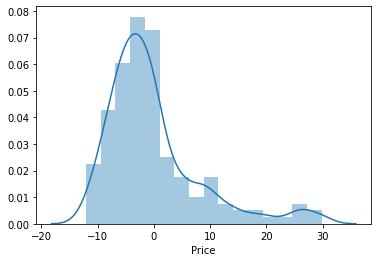

In [24]:
import seaborn as sns
sns.distplot(y_test-prediction_lasso)

<AxesSubplot:xlabel='Price'>

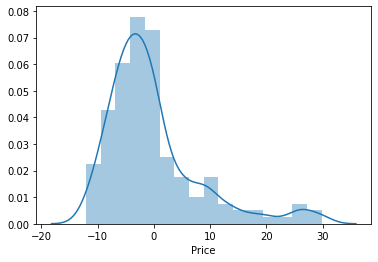

In [25]:
import seaborn as sns
sns.distplot(y_test-prediction_ridge)